In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
from Utils import running_mean, multiple_runs_with_different_seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import EvolutionStrategy as EvosStrat
importlib.reload(EvosStrat)
EvolutionStrategyClass = EvosStrat.EvolutionStrategy
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

In [3]:
Comp_config = {"objective_function": rana_func,
               "x_bounds" : (-500, 500),
                "x_length" : 5,
                "parent_number" : 10,
                "child_to_parent_ratio" : 7,
                "bound_enforcing_method" : "not_clipping" ,
                "selection_method" :  "standard_mew_comma_lambda" ,
                "standard_deviation_clipping_fraction_of_range" : 0.01,
                "mutation_covariance_initialisation_fraction_of_range" : 0.01 ,
                "mutation_method" : "complex",
               "termination_min_abs_difference": 1e-6,
              "maximum_archive_length": 100, "archive_minimum_acceptable_dissimilarity":0.1}
random_seed = 1

In [4]:
evo_comps = []
mutation_methods = ["complex", "diagonal"]
for mutation_method in mutation_methods:
    Comp_config["mutation_method"] = mutation_method
    np.random.seed(random_seed)
    evo_comp = EvolutionStrategyClass(**Comp_config)
    x_result, objective_result = evo_comp.run()
    print(f"x_result = {x_result} \n objective_result = {objective_result}\n\n\n\
      number of objective_evaluations is {evo_comp .objective_function_evaluation_count}")
    evo_comps.append(evo_comp)

max total iterations
x_result = [243.60427505 488.6937754  274.40742272 497.44176948 294.97771094] 
 objective_result = -1710.8763827411558


      number of objective_evaluations is 9940
max total iterations
x_result = [ 435.28981267  470.76362255  495.07437736 -246.04031359  364.74989187] 
 objective_result = -1728.3075975643953


      number of objective_evaluations is 9940


In [5]:
#evo_comps[1].offspring_x_history_array

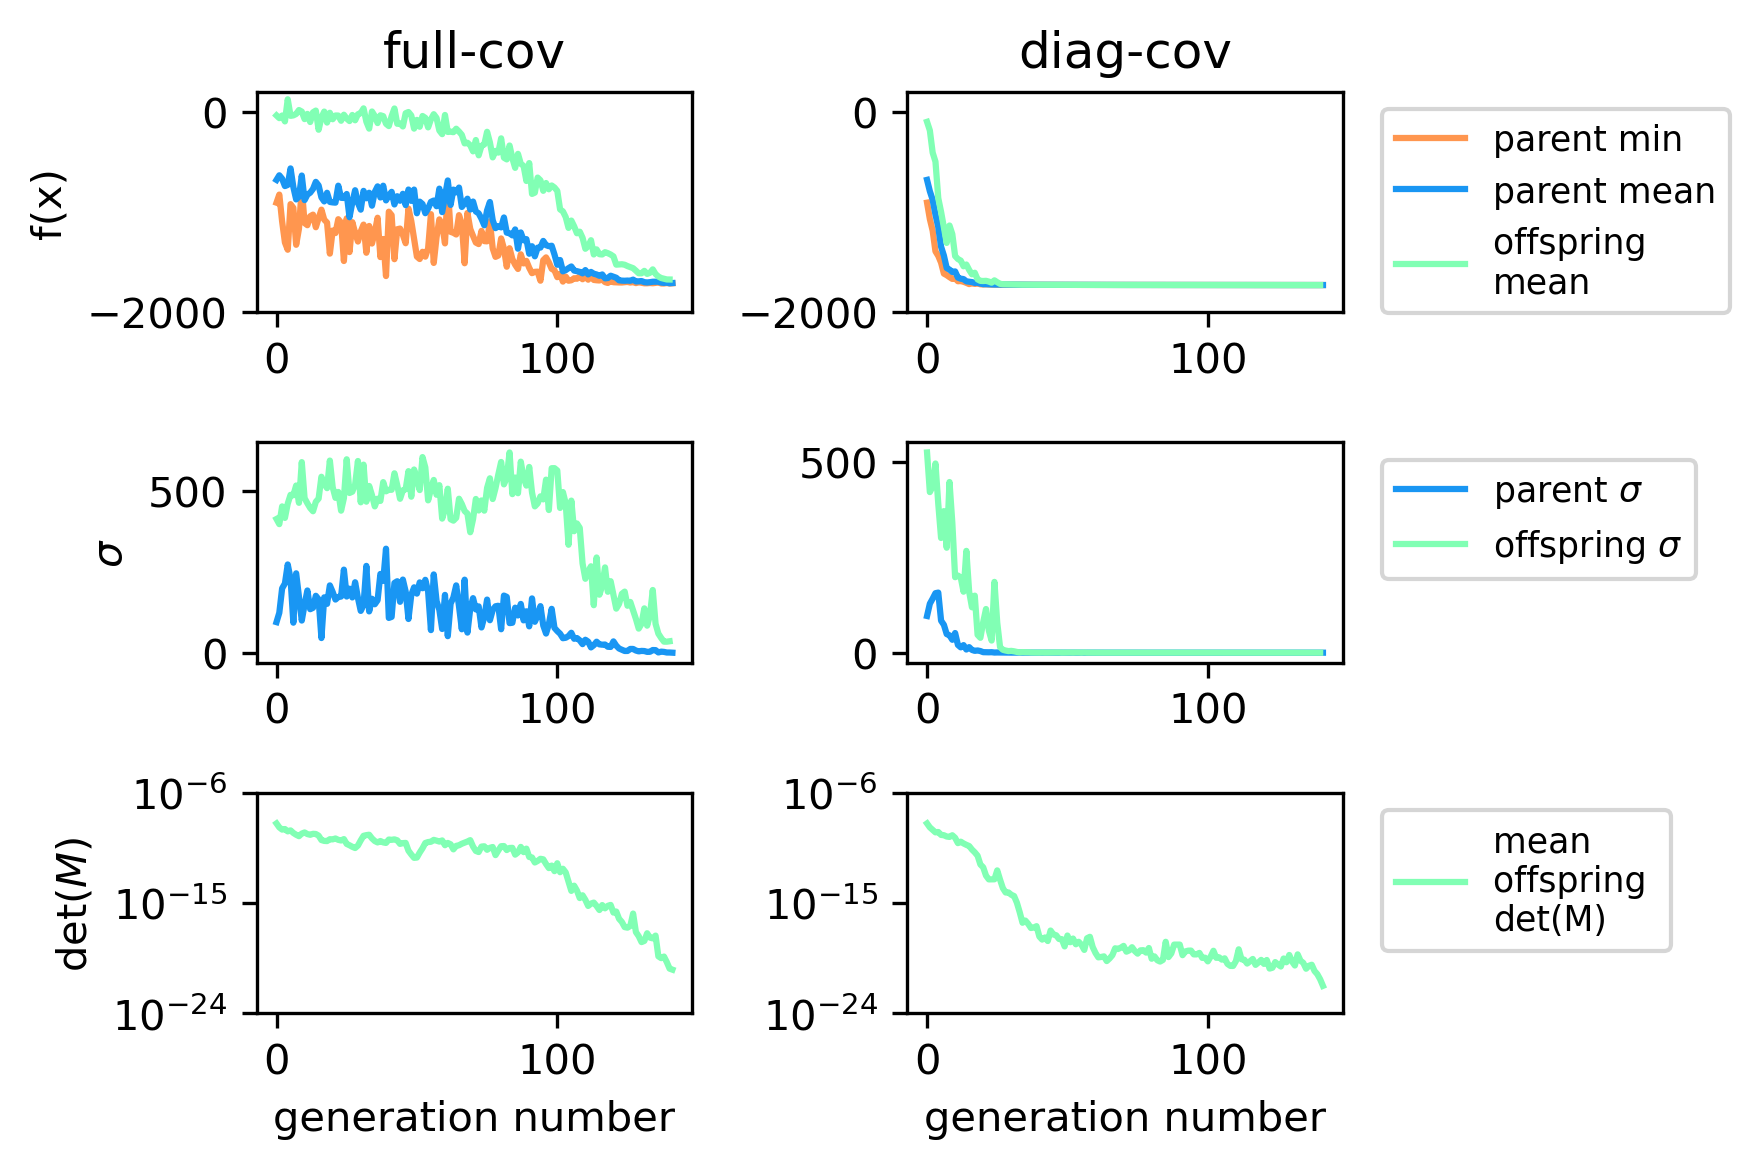

In [17]:
fig, axs = plt.subplots(3, 2) #, figsize=(5,4))
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
plot_list_1 = []
plot_list_2 = []
plot_list_3 = []
names = ["full-cov", "diag-cov"]
for i, mutation_method in enumerate(mutation_methods):
    specific_evo_comp = evo_comps[i]
    axs[0, i].set_title(names[i])
    p1, = axs[0, i].plot(np.min(specific_evo_comp.parent_objective_history_array, axis=1), label="parent min", color=cols[2])
    p2, = axs[0, i].plot(np.mean(specific_evo_comp.parent_objective_history_array, axis=1), label="parent mean", color=cols[0])
    axs[0, i].plot(np.mean(specific_evo_comp.offspring_objective_history_array, axis=1), label="offspring \nmean", color=cols[1])
    axs[0, i].set_ylim(-2000, 200)
    axs[1, i].plot(np.std(specific_evo_comp.parent_objective_history_array, axis=1), label=r"parent $\sigma$", color=cols[0])
    axs[1, i].plot(np.std(specific_evo_comp.offspring_objective_history_array, axis=1), label=r"offspring $\sigma$", color=cols[1])
    axs[2, i].plot(np.mean(specific_evo_comp.offspring_covariance_determinant_history_array, axis=1), 
                   label="mean \noffspring \ndet(M)", color=cols[1])
    #axs[2, i].plot(np.mean(specific_evo_comp.parent_covariance_determinant_history_array, axis=1), label="parent mean \n determinant")
    axs[2, i].set_yscale("log")

axs[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')   
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')   
axs[2, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small') 
axs[2, 0].set_xlabel("generation number")
axs[2, 1].set_xlabel("generation number")
axs[0, 0].set_ylabel("f(x)")
axs[1, 0].set_ylabel(r"$\sigma$")
axs[2, 0].set_ylabel(r"$\operatorname{det}(M)$")
axs[2, 0].set_yticks([1e-24, 1e-15, 1e-6])
axs[2, 1].set_yticks([1e-24, 1e-15, 1e-6])


fig.tight_layout()
fig.savefig("./Figures/ES5D_mutation_method.png", bbox_inches = 'tight',pad_inches = 0)